In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.optimizers import Adam

#import image_data_generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [2]:
# data generator
train_dataset = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 64,
    image_size = (256, 256), # resize the image because images are of different sizes
)

test_dataset = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 64,
    image_size = (256, 256), # resize the image because images are of different sizes
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [3]:
#normalize the images to [0,1]
def normalize_images(image, label):
    return image/255, label

train_dataset = train_dataset.map(normalize_images)
test_dataset = test_dataset.map(normalize_images)

In [4]:
# create the CNN architecture
# first we will try with tanh as activation then we will try with relu

model = Sequential()
model.add(Conv2D(16, (5,5), activation='tanh', padding = 'valid', input_shape=(256, 256, 3)))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Conv2D(32, (5,5),padding='valid' ,activation='tanh'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Conv2D(64, (5,5), padding ='valid', activation='tanh'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

# two dense hidden layers
model.add(Flatten())
model.add(Dense(64, activation='tanh'))
model.add(Dense(32, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [6]:
# fit the model
history = model.fit(train_dataset, epochs=15, verbose=1, validation_data=test_dataset)

Epoch 1/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 47s 120ms/step - accuracy: 0.5980 - loss: 0.6819 - val_accuracy: 0.6986 - val_loss: 0.5765
Epoch 2/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 37s 118ms/step - accuracy: 0.7108 - loss: 0.5538 - val_accuracy: 0.7468 - val_loss: 0.5158
Epoch 3/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 117ms/step - accuracy: 0.7672 - loss: 0.4926 - val_accuracy: 0.7618 - val_loss: 0.4924
Epoch 4/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 37s 117ms/step - accuracy: 0.7964 - loss: 0.4427 - val_accuracy: 0.7752 - val_loss: 0.4783
Epoch 5/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 33s 106ms/step - accuracy: 0.8203 - loss: 0.4027 - val_accuracy: 0.7780 - val_loss: 0.4816
Epoch 6/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 104ms/step - accuracy: 0.8467 - loss: 0.3557 - val_accuracy: 0.7734 - val_loss: 0.5011
Epoch 7/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 34s 109ms/step - accuracy: 0.8738 - loss: 0.3127 - val_accuracy: 0.7734 - val_loss: 0.5016
Epoch 8/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 104ms/step - accuracy: 0.9008 - loss: 0

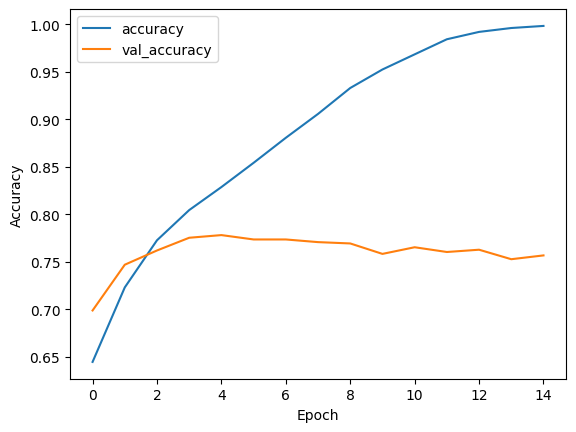

In [7]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [8]:
model = Sequential()
model.add(Conv2D(16, (5,5), activation='tanh', padding = 'valid', input_shape=(256, 256, 3)))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Conv2D(32, (5,5),padding='valid' ,activation='tanh'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Conv2D(64, (5,5), padding ='valid', activation='tanh'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

# two dense hidden layers
model.add(Flatten())
model.add(Dense(64, activation='tanh'))
model.add(Dense(32, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

In [9]:
# compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
# we see from the above plot that overfitting is happening. So we will try with early stopping
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(train_dataset, epochs=10, verbose=1, validation_data=test_dataset, callbacks=[early_stopping])

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 37s 106ms/step - accuracy: 0.5898 - loss: 0.6703 - val_accuracy: 0.7044 - val_loss: 0.5726
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 117ms/step - accuracy: 0.7072 - loss: 0.5658 - val_accuracy: 0.7418 - val_loss: 0.5240
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 37s 105ms/step - accuracy: 0.7610 - loss: 0.4972 - val_accuracy: 0.7632 - val_loss: 0.4890
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 102ms/step - accuracy: 0.7937 - loss: 0.4452 - val_accuracy: 0.7624 - val_loss: 0.4827
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 33s 105ms/step - accuracy: 0.8245 - loss: 0.4027 - val_accuracy: 0.7646 - val_loss: 0.4853
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 34s 109ms/step - accuracy: 0.8447 - loss: 0.3622 - val_accuracy: 0.7624 - val_loss: 0.4974
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 37s 117ms/step - accuracy: 0.8682 - loss: 0.3208 - val_accuracy: 0.7658 - val_loss: 0.4893


### Now we try with relu activation

In [11]:
model = Sequential()
model.add(Conv2D(16, (5,5), activation='relu', padding = 'valid', input_shape=(256, 256, 3)))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Conv2D(32, (5,5),padding='valid' ,activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Conv2D(64, (5,5), padding ='valid', activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

# two dense hidden layers
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [12]:
# compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [13]:

from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(train_dataset, epochs=10, verbose=1, validation_data=test_dataset, callbacks=[early_stopping])

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 115ms/step - accuracy: 0.5777 - loss: 0.6596 - val_accuracy: 0.7124 - val_loss: 0.5618
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 33s 107ms/step - accuracy: 0.7276 - loss: 0.5389 - val_accuracy: 0.7654 - val_loss: 0.4930
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 44s 117ms/step - accuracy: 0.7714 - loss: 0.4844 - val_accuracy: 0.7816 - val_loss: 0.4672
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 37s 106ms/step - accuracy: 0.7969 - loss: 0.4417 - val_accuracy: 0.7984 - val_loss: 0.4421
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 105ms/step - accuracy: 0.8110 - loss: 0.4120 - val_accuracy: 0.8088 - val_loss: 0.4241
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 106ms/step - accuracy: 0.8312 - loss: 0.3866 - val_accuracy: 0.8086 - val_loss: 0.4287
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 33s 105ms/step - accuracy: 0.8444 - loss: 0.3625 - val_accuracy: 0.8224 - val_loss: 0.4112
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 37s 118ms/step - accuracy: 0.8567 - loss: 0

### To address the problem of overfitting we perform data augmentation.
### We use Image_Data_Generator

In [18]:
# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# For testing images, only normalize pixel values (no augmentation needed)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create training data generator that reads images from the training directory
train_generator = train_datagen.flow_from_directory(
    directory = '/content/train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

# Create testing data generator that reads images from the testing directory
test_generator = test_datagen.flow_from_directory(
    directory ='/content/test',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [19]:
model = Sequential()
model.add(Conv2D(16, (5,5), activation='relu', padding = 'valid', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Conv2D(32, (5,5),padding='valid' ,activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Conv2D(64, (5,5), padding ='valid', activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

# two dense hidden layers
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [20]:
# compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [21]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(train_generator, epochs=30, verbose=1, validation_data = test_generator,callbacks=[early_stopping])

Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 133s 205ms/step - accuracy: 0.5295 - loss: 0.6863 - val_accuracy: 0.6936 - val_loss: 0.5900
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 126s 201ms/step - accuracy: 0.6692 - loss: 0.6068 - val_accuracy: 0.7314 - val_loss: 0.5435
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 127s 204ms/step - accuracy: 0.6917 - loss: 0.5793 - val_accuracy: 0.7440 - val_loss: 0.5155
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 126s 202ms/step - accuracy: 0.7028 - loss: 0.5700 - val_accuracy: 0.7604 - val_loss: 0.5047
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 128s 204ms/step - accuracy: 0.7165 - loss: 0.5444 - val_accuracy: 0.7760 - val_loss: 0.4762
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 126s 201ms/step - accuracy: 0.7337 - loss: 0.5303 - val_accuracy: 0.7690 - val_loss: 0.4767
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 128s 204ms/step - accuracy: 0.7440 - loss: 0.5197 - val_accuracy: 0.7758 - val_loss: 0.4624
Epoch 8/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 126s 202ms/step - accuracy: 0.7488 -

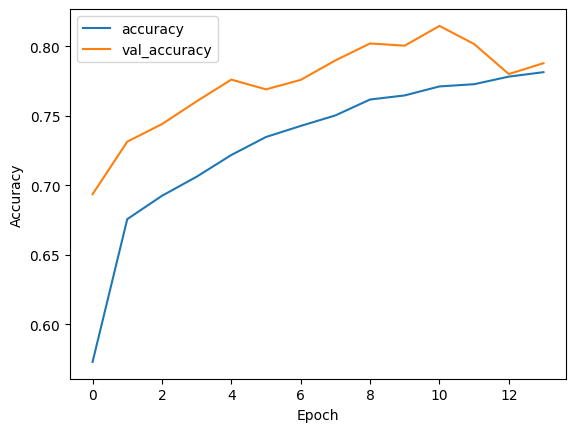

In [22]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

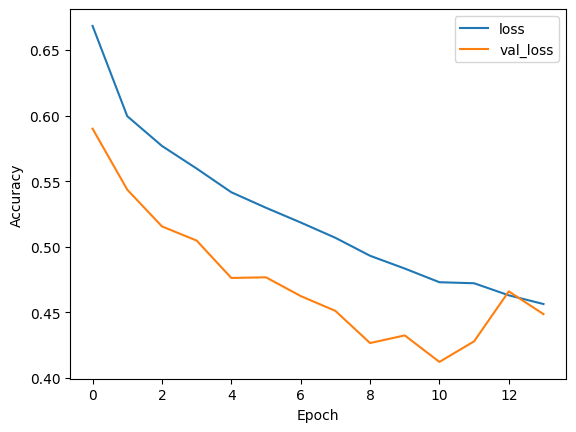

In [23]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()